# Introduction
A car company has the data for all the cars that are present in the market. They are planning to introduce some new ones of their own, but first, they want to find out what would be the popularity of the new cars in the market based on each car's attributes.

We will provide you a dataset of cars along with the attributes of each car along with its popularity. Your task is to train a model that can predict the popularity of new cars based on the given attributes.

# Dataset
You are given a training dataset, train.csv. The file is a comma separated file with useful information for this task:


* train.csv contains the information about a car along with its popularity level. Each row provides information on each car. Information such as buying_price, maintenance_cost, number_of_doors, number_of_seats, etc. The definition of each attribute is as follows:

    1. buying_price: The buying_price denotes the buying price of the car, and it ranges from [1...4], where buying_price equal to 1 represents the lowest price while buying_price equal to 4 represents the highest price.
    2. maintenance_cost: The maintenance_cost denotes the maintenance cost of the car, and it ranges from [1...4], where maintenance_cost equal to 1 represents the lowest cost while maintenance_cost equal to 4 represents the highest cost.
    3. number_of_doors: The number_of_doors denotes the number of doors in the car, and it ranges from [2...5], where each value of number_of_doors represents the number of doors in the car.
    4. number_of_seats: The number_of_seats denotes the number of seats in the car, and it consists of [2, 4, 5], where each value of number_of_seats represents the number of seats in the car.
    5. luggage_boot_size: The luggage_boot_size denotes the luggage boot size, and it ranges from [1...3], where luggage_boot_size equal to 1 represents smallest luggage boot size while luggage_boot_size equal to 3 represents largest luggage boot size.
    6. safety_rating: The safety_rating denotes the safety rating of the car, and it ranges from [1...3], where safety_rating equal to 1 represents low safety while safety_rating equal to 3 represents high safety.
    7. popularity: The popularity denotes the popularity of the car, and it ranges from [1...4], where popularity equal to 1 represents an unacceptable car, popularity equal to 2 represents an acceptable car, popularity equal to 3 represents a good car, and popularity equal to 4 represents the best car.
We also provide a test set of 100 car along with the above attributes excluding popularity, in test.csv. The goal is to predict the popularity of the car based on its attributes.


# Submission Details
You are required to upload the following three files:

* The output file prediction.csv (maximum allowed size is 1MB) containing the predicted values of the popularity attribute for each of the cars given in test.csv.

    * The output file will be evaluated against our hidden data and the grader will return a score.
    * If the uploaded file does not contain the same number of rows as the test.csv file, the grader will reject it.
    * Each line of the uploaded file must be either of 1, 2,3  or 4 denoting your model's prediction for that line in the test dataset. If any line contains anything other than a 1, 2,3 , or 4  its validation will fail.
A valid prediction.csv file has the following format:

1

3

4

2

2

    * Write a few lines about training dataset quality and any errors found in the training dataset.
    * Explain the data preprocessing steps.
    * Explain and justify the model you've chosen for the classification system.
* The source code of your approach for this task. Upload a zip file (maximum allowed size is 5MB) with all relevant files to reproduce your results. The submitted file must have a README file with a detailed description about how to run the model to predict the popularity and generate the prediction.csv. Do not forget to include links to any external libraries or packages you use for the generation of your model.

There is no limit on execution time, but the code should generate the output file: prediction.csv.

# MACHINE LERANING PROJECT
# CAR POPULARITY PREDICTION

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import *
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data
df=pd.read_csv('TrainDataset.csv')

In [3]:
df.head()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
0,3,4,5,4,2,2,1
1,2,3,5,4,2,2,2
2,3,3,3,4,3,2,2
3,3,2,4,4,2,3,2
4,1,4,3,5,1,3,2


### Data Quality

Our train dataset contained 1628 rows and 7 columns, and test data contained
100 rows and 6 columns.
Data to predict – popularity (of cars)
Predictors – buying_price
 
 1. Maintainance_cost
 2. number_of_doors
 3. number_of_seats
 4. luggage_boot_size
 5. safety_rating 

In [111]:

for i in df.columns:
    print(df[i].value_counts())

4    334
2    332
3    331
1    305
Name: buying_price, dtype: int64
2    334
4    332
1    321
3    315
Name: maintainence_cost, dtype: int64
2    333
5    328
3    321
4    320
Name: number_of_doors, dtype: int64
2    447
5    437
4    418
Name: number_of_seats, dtype: int64
1    445
3    433
2    424
Name: luggage_boot_size, dtype: int64
1    445
3    432
2    425
Name: safety_rating, dtype: int64
1    941
2    294
3     36
4     31
Name: popularity, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 7 columns):
buying_price         1302 non-null int64
maintainence_cost    1302 non-null int64
number_of_doors      1302 non-null int64
number_of_seats      1302 non-null int64
luggage_boot_size    1302 non-null int64
safety_rating        1302 non-null int64
popularity           1302 non-null int64
dtypes: int64(7)
memory usage: 71.3 KB


In [6]:
df.describe()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,2.533026,2.505376,3.493856,3.649002,1.990783,1.990015,1.352535
std,1.109695,1.119824,1.125298,1.259733,0.821450,0.820973,0.653252
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,3.000000,4.000000,2.000000,2.000000,1.000000
75%,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,4.000000


## DATA PRE-PROCESSING

#### To preprocess the data we have done finding all kind of plots , finding the number of null values , and feature engineering.

In [7]:
#check for null values

df.isnull().sum()

buying_price         0
maintainence_cost    0
number_of_doors      0
number_of_seats      0
luggage_boot_size    0
safety_rating        0
popularity           0
dtype: int64

### LOOKING INTO DATA
##### Checking for null values -
As we see into data , we check for null values – checking at the whole data we found no null values in any column. So no missing values in this train set.
##### Checking for errors –
As we see that the values can’t be out of the range that is described for each and every figure, and for graph we noticed that dataset set does not contain any erroneous value.
#### Checking for outliers –
As we see the boxplot of the popularity, we figure out that nothing can be judged as outlier.


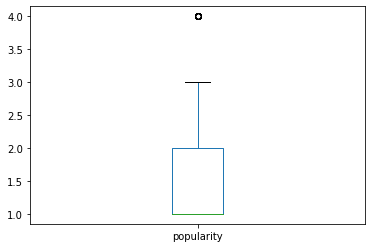

In [52]:
df1.boxplot('popularity',grid=False)

### We see that the popularity 4 may seem like an outlier but it is not, rather it is a data of great importance with less number of occurences.

## Exploratory data analysis

### Univariate

### Bar chart representation of popularity meter

Checking data distribution –
Popularity

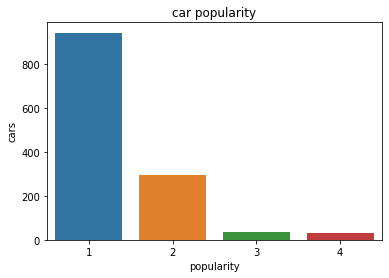

In [8]:
#barplot of popularity


sns.countplot(x='popularity',data=df)
plt.title('car popularity')
plt.xlabel('popularity')
plt.ylabel('cars')
plt.show()

#### So we see that maximum of our input data is of the popularity range 1 , and very few of the data are of popularity 3 or 4.
#### .
#### Looking at the stats of popularity also suggests the same 

In [9]:
df1=pd.read_csv('TrainDataset.csv')

In [10]:
def conver(x):
    return x.map({1:'low',2:'affordable',3:'moderate',4:'high'})

df1[['buying_price']]=df1[['buying_price']].apply(conver)



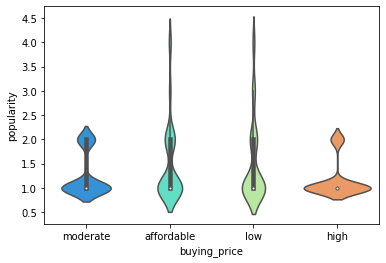

In [11]:
sns.violinplot(x="buying_price",y='popularity',data=df1,palette='rainbow')

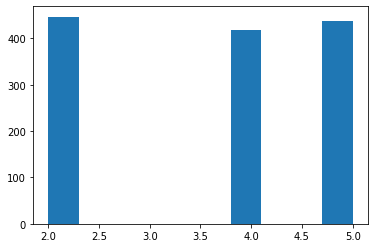

In [12]:
plt.hist(df['number_of_seats'])
plt.show()

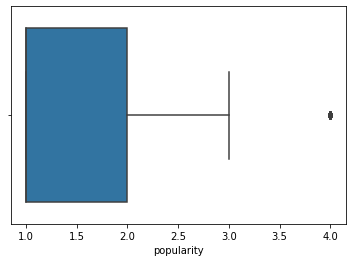

In [13]:

sns.boxplot(x=df.popularity)
plt.show()

Text(0.5, 0.98, '')

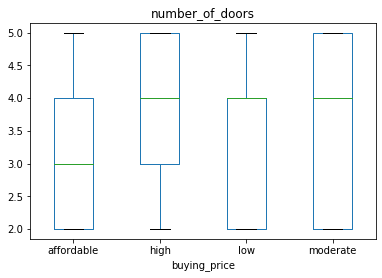

In [50]:
df1.boxplot('number_of_doors', by = 'buying_price',grid=False) 
plt.suptitle("")


## bivariate 

In [14]:
df.columns

Index(['buying_price', 'maintainence_cost', 'number_of_doors',
       'number_of_seats', 'luggage_boot_size', 'safety_rating', 'popularity'],
      dtype='object')

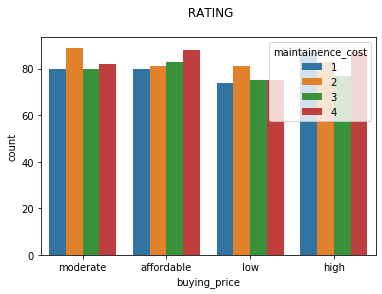

In [15]:
sns.countplot(x='buying_price', hue="maintainence_cost", data=df1)
plt.title(' RATING\n')
plt.show()

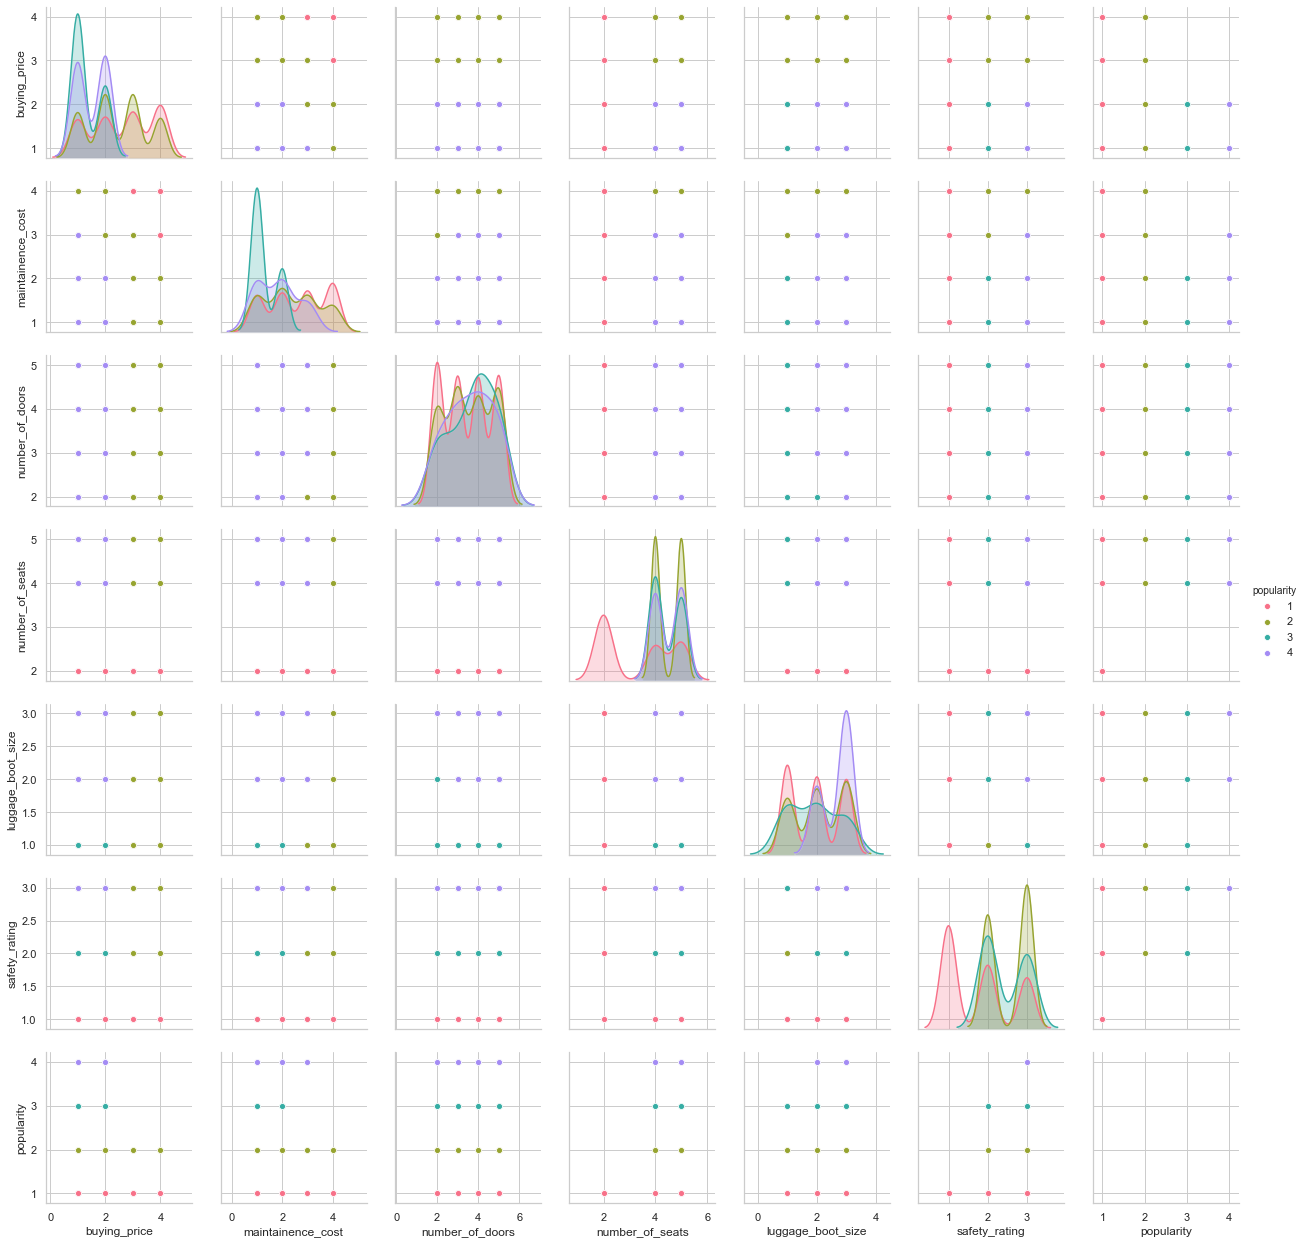

In [74]:
sns.pairplot(df, hue='popularity', palette="husl")


In [16]:
columns=['buying_price','maintainence_cost','number_of_doors','number_of_seats','luggage_boot_size','safety_rating']


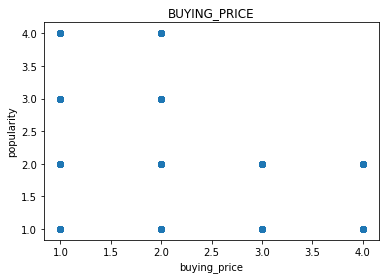

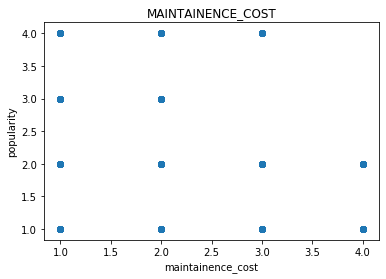

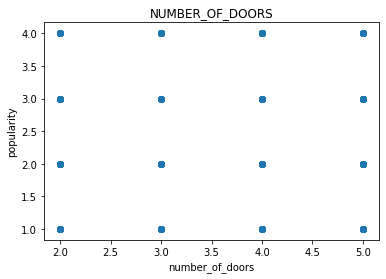

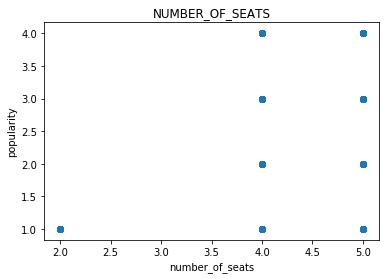

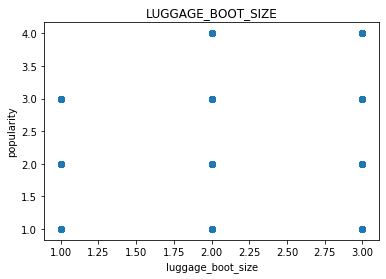

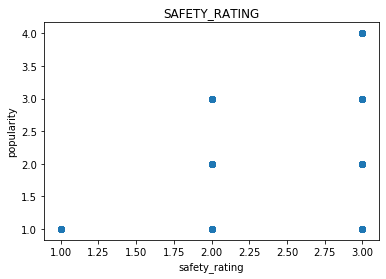

In [17]:
for i in columns:
    plt.scatter(df[i],df.popularity)
    plt.title(i.upper())
    plt.ylabel('popularity')
    plt.xlabel(i)
    plt.show()


#### We see that the cars with higher price don’t have that much popularity.
#### As expected maintainance cost also has the same kind of relationship with popularity.

In [18]:
df.corr()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
buying_price,1.000000,-0.006019,0.014320,0.022870,0.016355,0.043813,-0.214884
maintainence_cost,-0.006019,1.000000,0.015885,0.003791,0.026793,0.000476,-0.196453
number_of_doors,0.014320,0.015885,1.000000,-0.025651,0.011580,-0.010467,0.047388
number_of_seats,0.022870,0.003791,-0.025651,1.000000,-0.013528,-0.035350,0.361573
luggage_boot_size,0.016355,0.026793,0.011580,-0.013528,1.000000,-0.011534,0.123515
safety_rating,0.043813,0.000476,-0.010467,-0.035350,-0.011534,1.000000,0.420769
popularity,-0.214884,-0.196453,0.047388,0.361573,0.123515,0.420769,1.000000


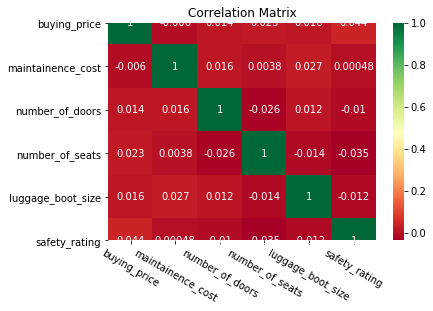

In [19]:

corr_data = df[columns]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

# This reveals a clear relationship among safety_rating and popularity.

To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “safety_rating" has a high correlation with “popularity” , compared to others.

### Count plot to understand relationship between target varible(popularity) & independent variable (safety rating)

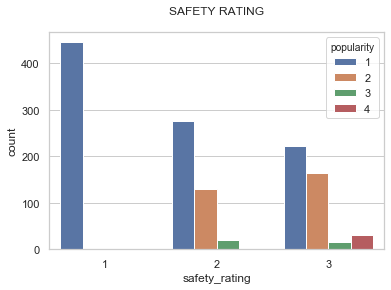

In [252]:
sns.countplot(x='safety_rating', hue="popularity", data=df)
plt.title('SAFETY RATING\n')
plt.show()

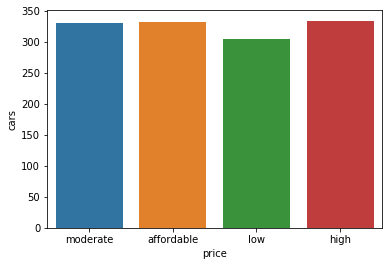

In [20]:
sns.countplot(x='buying_price',data=df1)
plt.xlabel('price')
plt.ylabel('cars')
plt.show()

### We can observe a slight difference in each plot based on safty rating & popularity for each kind of buying price

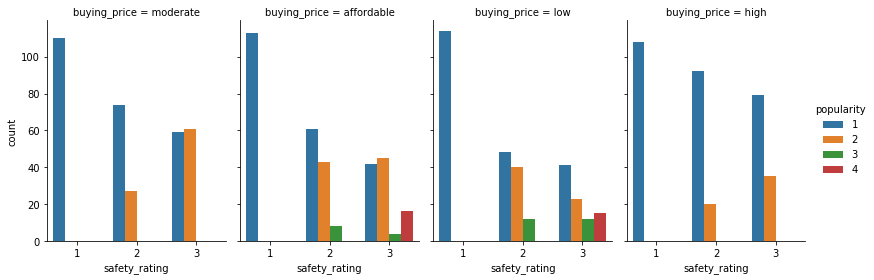

In [15]:
sns.catplot(x="safety_rating", hue="popularity", col="buying_price",data=df1, kind="count",height=4, aspect=.7);

## Train test split

### Predictive modeling



In [14]:
X= df.drop('popularity', axis = 1)
Y=df['popularity']

In [15]:

from sklearn.metrics import confusion_matrix


In [16]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.multiclass import OneVsRestClassifier
# 20% of the data will be used for testing
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=7)

In [17]:

logreg = LogisticRegression()
ovr = OneVsRestClassifier(logreg)

In [18]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((1041, 6), (1041,), (261, 6), (261,))

In [19]:
ovr.fit(X_train,Y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [20]:
y_train_pred=ovr.predict(X_train )
y_test_pred=ovr.predict(X_test)
from sklearn.metrics import *

In [21]:
name='LOGISTIC REGRESSION'
g=['Train data','Test data']
print('LOGISTIC REGRESSION')
tr=[Y_train,Y_test]
ts=[y_train_pred, y_test_pred]
print('-'*40)
for i,j,k in zip(g,tr,ts):
    print(i.upper())
    print('='*40)
    accuracy = accuracy_score(j, k)
    print('Accuracy: %f' % accuracy)
    precision = precision_score(j, k,average='macro')
    print('Precision: %.2f' % precision)
  
    recall = recall_score(j, k,average='macro')
    print('Recall: %.2f' % recall,)
  
    f1 = f1_score(j, k,average='macro')
    print('F1 score: %f' % f1)
    print('-'*40)
    print(classification_report(j,k))
    print('-'*40)
 
    print(confusion_matrix(j,k))
    print('\n')

LOGISTIC REGRESSION
----------------------------------------
TRAIN DATA
Accuracy: 0.823247
Precision: 0.54
Recall: 0.42
F1 score: 0.437780
----------------------------------------
              precision    recall  f1-score   support

           1       0.88      0.95      0.92       746
           2       0.62      0.60      0.61       236
           3       0.67      0.13      0.22        30
           4       0.00      0.00      0.00        29

    accuracy                           0.82      1041
   macro avg       0.54      0.42      0.44      1041
weighted avg       0.79      0.82      0.80      1041

----------------------------------------
[[711  32   1   2]
 [ 93 142   1   0]
 [  1  25   4   0]
 [  0  29   0   0]]


TEST DATA
Accuracy: 0.842912
Precision: 0.40
Recall: 0.39
F1 score: 0.393636
----------------------------------------
              precision    recall  f1-score   support

           1       0.90      0.94      0.92       195
           2       0.69      0.62     

In [59]:
from sklearn.ensemble import RandomForestClassifier


In [60]:
rf_ = RandomForestClassifier(random_state = 8)


In [61]:
# Now, we can fit the model to our training data:

rf_.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [62]:
y_train_pred=best_rfc.predict(X_train )
y_test_pred=best_rfc.predict(X_test)

In [63]:
name='RANDOM FOREST'
g=['Train data','Test data']
print(name.upper())
tr=[Y_train,Y_test]
ts=[y_train_pred, y_test_pred]
print('-'*40)
for i,j,k in zip(g,tr,ts):
    print(i.upper())
    print('='*40)
    accuracy = accuracy_score(j, k)
    print('Accuracy: %f' % accuracy)
    precision = precision_score(j, k,average='weighted')
    print('Precision: %.2f' % precision)
  
    recall = recall_score(j, k,average='weighted')
    print('Recall: %.2f' % recall,)
  
    f1 = f1_score(j, k,average='macro')
    print('F1 score: %f' % f1)
    print('-'*40)
    print(classification_report(j,k))
    print('-'*40)
 
    print(confusion_matrix(j,k))
    print('\n')

RANDOM FOREST
----------------------------------------
TRAIN DATA
Accuracy: 0.999039
Precision: 1.00
Recall: 1.00
F1 score: 0.999304
----------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       746
           2       1.00      1.00      1.00       236
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        29

    accuracy                           1.00      1041
   macro avg       1.00      1.00      1.00      1041
weighted avg       1.00      1.00      1.00      1041

----------------------------------------
[[745   1   0   0]
 [  0 236   0   0]
 [  0   0  30   0]
 [  0   0   0  29]]


TEST DATA
Accuracy: 0.977011
Precision: 0.98
Recall: 0.98
F1 score: 0.805335
----------------------------------------
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       195
           2       0.95      0.97      0.96 

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

l=['Logistic Regression','Decision Tree Classifier','RandomForestClassifier']
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('RandomForest',RandomForestClassifier(random_state = 8)))
# evaluate each model in turn
results = []
names = []
print('-------------ACCURACY SCORE-----------------')
for name, model in models:
    model.fit(X_train,Y_train)
    y_pred_class = model.predict(X_test)
    acc=metrics.accuracy_score(Y_test, y_pred_class)
    results.append(acc)
    names.append(name)
    print('='*40)
    print("%s: %f" %(name, acc))
print('\n')

-------------ACCURACY SCORE-----------------
LR: 0.865900
Decision Tree: 0.980843
RandomForest: 0.977011




DECISION TREE CLASSIFIER has highest accuracy on test data: 0.9808429118773946


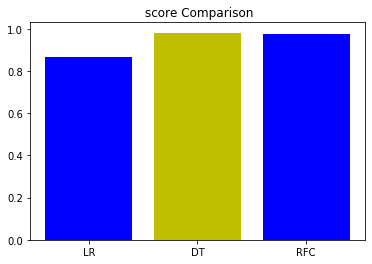

In [58]:

names=['LR','DT','RFC']
ind=results.index(max(results))
print(l[ind].upper(),'has highest accuracy on test data:',max(results))
plt.title(' score Comparison')
colors=['b','y','b']
plt.bar(names,results,color=colors)
plt.show()


In [96]:
RF=RandomForestClassifier(random_state = 8)

In [97]:
RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [99]:
DT=DecisionTreeClassifier()

In [100]:
DT.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [101]:
OVR_y=ovr.predict(X_test)
RFC_y=RF.predict(X_test)
DT_y=DT.predict(X_test)
lst=[OVR_y,RFC_y,DT_y]

In [104]:
for i in lst:
    print(round(accuracy_score(Y_test,i),3))

0.843
0.977
0.981


In [82]:
test_data=pd.read_csv('TestDataset.csv')

In [83]:
test_data.head()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating
0,4,3,4,5,2,3
1,2,1,3,4,1,1
2,2,2,3,2,3,1
3,3,4,2,5,2,2
4,1,3,4,2,3,2


In [107]:
#preparing the csv file
OVR_y=ovr.predict(test_data)

submission1={"popularity":OVR_y}
submission=pd.DataFrame(submission1)
submission.to_csv("CAR_LR.csv",index=False,header=False)

In [108]:
RFC_y=RF.predict(test_data)

submission2={"popularity":RFC_y}
submission=pd.DataFrame(submission2)
submission.to_csv("CAR_RF.csv",index=False,header=False)

In [109]:
DT_y=DT.predict(test_data)


submission3={"popularity":DT_y}
submission=pd.DataFrame(submission3)
submission.to_csv("CAR_DT.csv",index=False,header=False)

In [110]:
submission.head()

,popularity
0,1
1,1
2,1
3,1
4,1
